# Generate additional visualizations

In this notebook, we'll load our final dataset and generate a few additional visualizations, like UMAP with adjusted parameters.

## Load packages

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from datetime import date
import hisepy
import os
import pandas as pd
import scanpy as sc

## Helper functions for loading HISE data

In [2]:
def read_adata_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file)
    return adata

In [27]:
def obs_with_umap(adata):
    obs = adata.obs
    
    umap_mat = adata.obsm['X_umap']
    umap_df = pd.DataFrame(umap_mat, columns = ['umap_1', 'umap_2'])
    obs['umap_1'] = umap_df['umap_1']
    obs['umap_2'] = umap_df['umap_2']

    return obs

In [3]:
out_dir = 'output'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [4]:
out_files = []

## Read annotated datasets

In [5]:
h5ad_uuid = '6e8972a5-9463-4230-84b4-a20de055b9c3'

In [6]:
adata = read_adata_uuid(h5ad_uuid)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


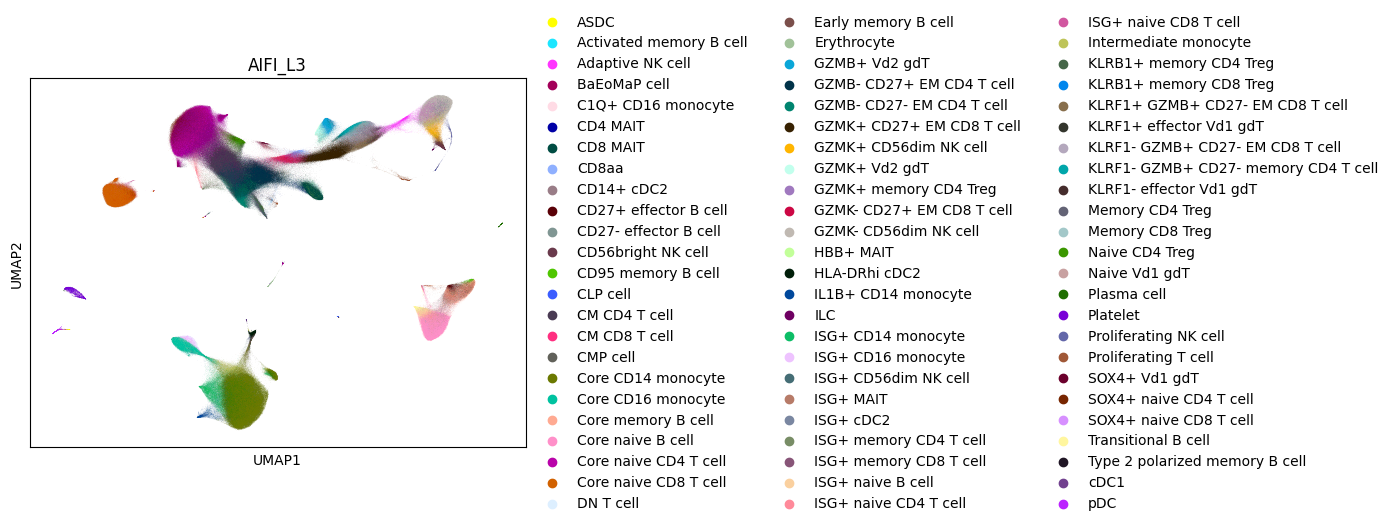

In [7]:
sc.pl.umap(adata, color = 'AIFI_L3')

## Update UMAP

Here, we'll re-run UMAP with a larger `min_dist` parameter (originally 0.05, now trying 0.2).

We'll also initialize the UMAP projection using the first 2 principal components.

In [8]:
pc_init_mat = adata.obsm['X_pca_harmony'][:,0:2]

In [9]:
pc_init_mat.shape

(1823666, 2)

In [10]:
%%time
sc.tl.umap(
    adata,
    min_dist = 0.4,
    init_pos = pc_init_mat
)

CPU times: user 43min 12s, sys: 12.7 s, total: 43min 25s
Wall time: 43min 55s


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


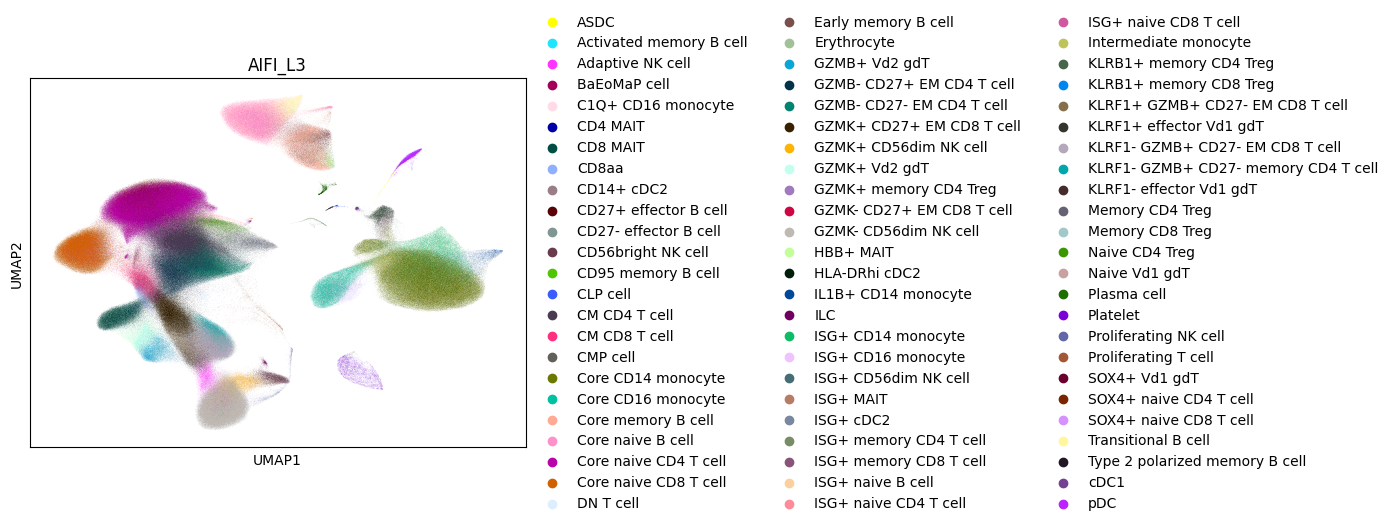

In [11]:
sc.pl.umap(adata, color = 'AIFI_L3')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


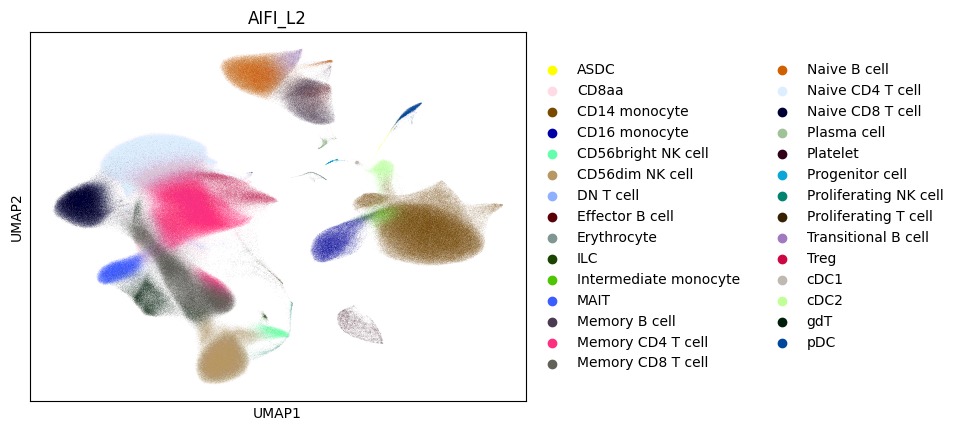

In [12]:
sc.pl.umap(adata, color = 'AIFI_L2')

In [32]:
out_file = 'output/ref_clean_pbmc_all_labeled_{d}.h5ad'.format(d = date.today())

In [14]:
adata.write_h5ad(out_file)

In [28]:
meta = obs_with_umap(adata)

In [29]:
out_csv = 'output/ref_clean_pbmc_all_labeled_meta_{d}.csv'.format(d = date.today())
meta.to_csv(out_csv)

In [30]:
out_parquet = 'output/ref_clean_pbmc_all_labeled_meta_{d}.parquet'.format(d = date.today())
meta.to_parquet(out_parquet)

## Upload results to HISE

Finally, we'll use `hisepy.upload.upload_files()` to send a copy of our output to HISE to use for downstream analysis steps.

In [15]:
study_space_uuid = '64097865-486d-43b3-8f94-74994e0a72e0'
title = '10x 3-prime PBMC Clean Reference with updated projections {d}'.format(d = date.today())

In [16]:
in_files = [h5ad_uuid]

In [17]:
in_files

['6e8972a5-9463-4230-84b4-a20de055b9c3']

In [33]:
out_files = [out_file, out_csv, out_parquet]
out_files

['output/ref_clean_pbmc_all_labeled_2024-03-21.h5ad',
 'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.csv',
 'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.parquet']

In [34]:
hisepy.upload.upload_files(
    files = out_files,
    study_space_id = study_space_uuid,
    title = title,
    input_file_ids = in_files
)

output/ref_clean_pbmc_all_labeled_2024-03-21.h5ad
output/ref_clean_pbmc_all_labeled_meta_2024-03-21.csv
output/ref_clean_pbmc_all_labeled_meta_2024-03-21.parquet
you are trying to upload file_ids... ['output/ref_clean_pbmc_all_labeled_2024-03-21.h5ad', 'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.csv', 'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.parquet']. Do you truly want to proceed?


(y/n) y


{'trace_id': '36cd2e54-40ef-4930-9d29-ed776010ee11',
 'files': ['output/ref_clean_pbmc_all_labeled_2024-03-21.h5ad',
  'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.csv',
  'output/ref_clean_pbmc_all_labeled_meta_2024-03-21.parquet']}

In [35]:
import session_info
session_info.show()